<h4 style="text-align:center; font-size: 30px"> CSCI E-80A Intro to Artificial Intelligence, Fall  2023</h4>
<h4 style="text-align:center; font-size: 20px"> Harvard University Extension School</h4>
<h5 style="text-align:center; font-size: 20px"> Prof. Brian Subirana</h5>

![Harvard logo](harvard1.png)

<h3 style='text-align: center ;font-size:30px'> Final Project </h3>

<h3 style='text-align: center ;'> Speech Emotion Recognition  </h3>

<h3 style='text-align: center;font-size:'> Arzu ISIK TOPBAS </h3>

<hr style='color: LightSlateGray; height: 1.px'>  </hr>

**Table of contents**<a id='toc0_'></a>    
- [Overview](#toc1_)    
  - [Importing Libraries](#toc1_1_)    
  - [Data Collection](#toc1_2_)    
  - [Data Wrangling](#toc1_3_)    
  - [Data Processing](#toc1_4_)
    - [Raw Audio Waveforms - Signal](#toc1_4_1_)    
    - [Frequency Spectrum (FFT)](#toc1_4_2_)
    - [Short-Time Fourier Transform (STFT) Spectrogram](#toc1_4_3_)
    - [Mel Spectrogram](#toc1_4_4_)
  - [Modeling](#toc1_5_)
    - [Mel Spectrogram CNN Model](#toc1_5_1_)    
    - [MFCCs CNN Model](#toc1_5_2_)
    - [MFCCs CRNN Model](#toc1_5_3_)   
  - [Final Thoughts](#toc1_6_)
  - [Real Life Integration (Future Work)](#toc1_7_)    
 


<hr style='color: LightSlateGray; height: 1.px'>  </hr>

# <a id='toc1_'></a>[Overview](#toc0_)

<hr style='color: LightSlateGray; height: 1.px'>  </hr>

2. Term Project Proposal 

I propose to undertake a project focused on Speech Emotion Recognition (SER) utilizing AI technologies. The objective of this project is to develop a system capable of analyzing and identifying emotional states expressed through speech.

Objective

In this project, my primary objective is to develop an AI model that can effectively recognize and classify emotions in audio data, encompassing emotions like happiness, sadness, and anger. 

Real Life Integration

The project can integrate real-life data by analyzing the quarterly earnings calls of S&P 500 companies to understand how the speakers' emotions influence the stock market after controlling the content of the speech. This analysis aims to provide valuable insights for investors to make informed decisions based on the emotions expressed by the speakers during these calls.

Benefits and Implications

The outcomes of this project will provide valuable insights for investors and financial analysts. Understanding how emotions expressed during earnings calls affect stock market behavior can lead to more informed investment decisions. It also has the potential to improve sentiment analysis tools used in financial markets.

Dataset

I plan to use RAVDESS and TESS datasets which have a combined 1170 total audio files. The files are already labeled with the emotions recorded by the different actors (both male and female).

Speech Emotion Recognition Model

I will develop a deep learning model for emotion recognition using Time Distributed CNN and LSTM. This model will identify the emotional states in the spoken feedback, such as happiness, frustration, confusion, or enthusiasm. Additionally, I will explore transfer learning techniques, leveraging pre-trained models for feature extraction or fine-tuning.

Evaluation

The model's performance will be assessed using metrics like accuracy, precision, recall, and F1-score. Cross-validation and testing on unseen data will be crucial to ensure the model's robustness.



## <a id='toc1_1_'></a>[Import Libraries](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import librosa
import librosa.display
import IPython.display as ipd

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import (
    Dense, BatchNormalization, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Reshape, 
Bidirectional, LSTM, Dropout
)

from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

## <a id='toc1_2_'></a>[Data Collection](#toc0_)

We will be using four datasets in this project from [KAGGLE](https://www.kaggle.com/datasets/dmitrybabko/speech-emotion-recognition-en?resource=download). The audio files and their labels are named differently in each of the datasets. There are also various feelings in each dataset. Therefore, some negotiating will be necessary to have them all in the same format.

* [RAVDESS](https://zenodo.org/record/1188976#.X2Q4Z2gzZPY)
* [TESS](https://tspace.library.utoronto.ca/handle/1807/24487)
* [SAVEE](http://kahlan.eps.surrey.ac.uk/savee/)
* [CREMA-D](https://github.com/CheyneyComputerScience/CREMA-D)

## <a id='toc1_3_'></a>[Data Wrangling](#toc0_)

In [2]:
# Paths
Ravdess = "archive/Ravdess/audio_speech_actors_01-24/"
Crema = "archive/Crema/"
Tess = "archive/Tess/"
Savee = "archive/Savee/"

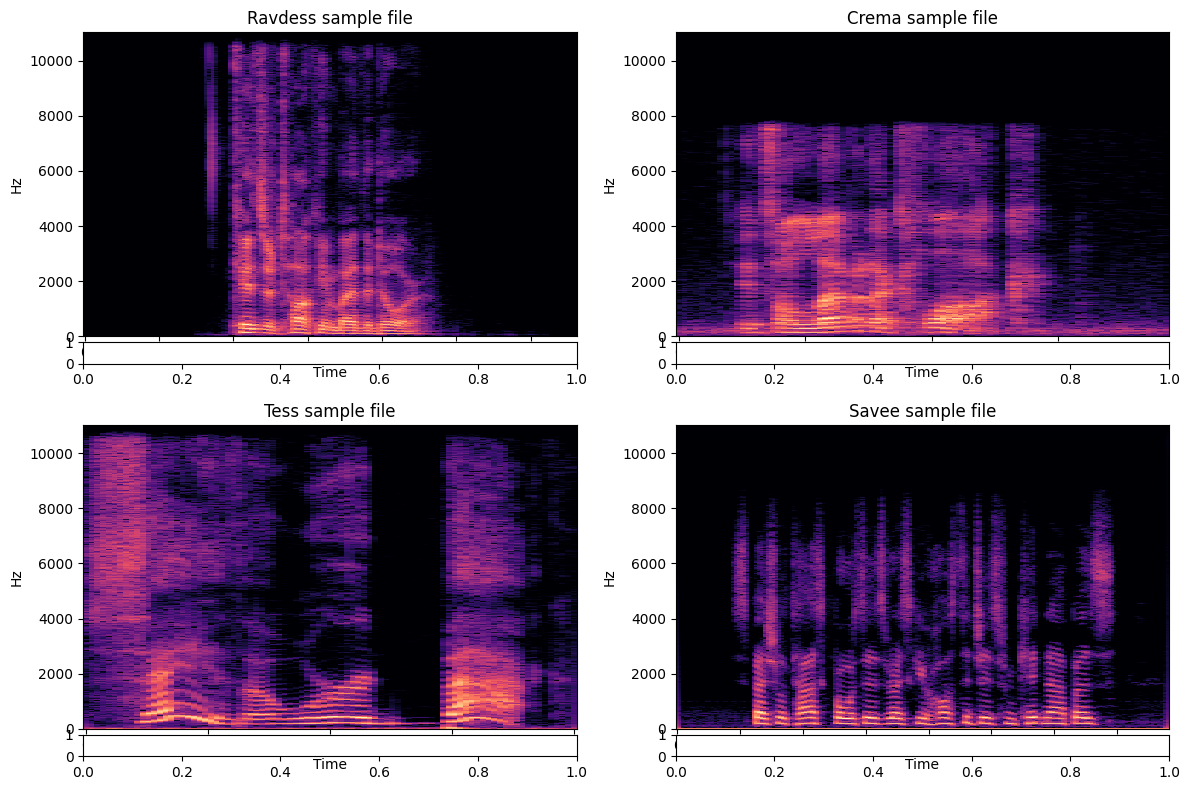

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def load_and_display_sample(ax, file_path, title):
    # Load audio file
    data, sampling_rate = librosa.load(file_path)
    
    # Compute Short-Time Fourier Transform (STFT)
    D = librosa.stft(data)
    
    # Convert amplitude to dB scale
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Display spectrogram
    librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
    ax.set_title(title)

    # Add space for the audio player
    ax_divider = make_axes_locatable(ax)
    cax = ax_divider.append_axes("bottom", size="7%", pad="2%")
    
    # Play audio
    ipd.display(ipd.Audio(file_path), display_id=title)  # Use display_id to separate audio players

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12,8))

# Ravdess sample
ravdess_file = os.path.join(Ravdess, 'Actor_01/03-01-01-01-01-01-01.wav')
load_and_display_sample(axs[0, 0], ravdess_file, "Ravdess sample file")

# Crema sample
crema_file = os.path.join(Crema, '1001_IEO_ANG_HI.wav')
load_and_display_sample(axs[0, 1], crema_file, "Crema sample file")

# Tess sample
tess_file = os.path.join(Tess, 'OAF_happy/OAF_back_happy.wav')
load_and_display_sample(axs[1, 0], tess_file, "Tess sample file")

# Savee sample
savee_file = os.path.join(Savee, 'DC_f08.wav')
load_and_display_sample(axs[1, 1], savee_file, "Savee sample file")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [4]:
# Create labels
ravdess = os.listdir(Ravdess)

emotions = []
paths = []

for dir in ravdess:
   
    for file in os.listdir(Ravdess + dir):
        emotion = file.split('-')[2]
        if emotion == '01':
            emotion = 'neutral'
        elif emotion == '02':
            emotion = 'calm'
        elif emotion == '03':
            emotion = 'happiness'
        elif emotion == '04':
            emotion = 'sadness'
        elif emotion == '05':
            emotion = 'anger'
        elif emotion == '06':
            emotion = 'fear'
        elif emotion == '07':
            emotion = 'disgust'
        elif emotion == '08':
            emotion = 'surprise'
        else:
            emotion = 'Unknown'
        # Extract the path
        path = Ravdess + dir + '/' + file
        # Append the emotion and path to their lists
        emotions.append(emotion)
        paths.append(path)
# Create a dataframe from the lists
ravdess_df = pd.DataFrame(emotions, columns=['Emotion'])
ravdess_df['Path'] = paths
# Inspect the dataframe
ravdess_df.head(2)

Emotion                                               Path
0   anger  archive/Ravdess/audio_speech_actors_01-24/Acto...
1    fear  archive/Ravdess/audio_speech_actors_01-24/Acto...

In [5]:
# Create labels
cremad = os.listdir(Crema)
emotions = []
paths = []
# parse the filename to get the emotions
for file in cremad:
    # Extract the emotion label from the file name
    emotion = file.split('_')[2]
    if emotion == 'SAD':
        emotion = 'sadness'
    elif emotion == 'ANG':
        emotion = 'anger'
    elif emotion == 'DIS':
        emotion = 'disgust'
    elif emotion == 'FEA':
        emotion = 'fear'
    elif emotion == 'HAP':
        emotion = 'happiness'
    elif emotion == 'NEU':
        emotion = 'neutral'
    elif emotion == 'SUR':
        emotion = 'surprise'
    else:
        emotion = 'Unknown'
    # Extract the path
    path = Crema + file
    # Append the emotion and path to their lists
    emotions.append(emotion)
    paths.append(path)
# Create a dataframe from the lists
cremad_df = pd.DataFrame(emotions, columns=['Emotion'])
cremad_df['Path'] = paths
# Inspect the dataframe
cremad_df.head(2)

Emotion                               Path
0   anger  archive/Crema/1022_ITS_ANG_XX.wav
1   anger  archive/Crema/1037_ITS_ANG_XX.wav

In [6]:
# Create labels
tess = os.listdir(Tess)

emotions = []
paths = []

for dir in tess:
    for file in os.listdir(Tess + dir):
        emotion = file.split('.')[0]
        emotion = emotion.split('_')[2]
        if emotion == 'ps':
            emotion = 'surprise'
        elif emotion == 'sad':
            emotion = 'sadness'
        elif emotion == 'disgust':
            emotion = 'disgust'
        elif emotion == 'angry':
            emotion = 'anger'
        elif emotion == 'happy':
            emotion = 'happiness'
        elif emotion == 'neutral':
            emotion = 'neutral'
        elif emotion == 'fear':
            emotion = 'fear'
        else:
            emotion = 'Unknown'

        path = Tess + dir + '/' + file
        emotions.append(emotion)
        paths.append(path)
tess_df = pd.DataFrame(emotions, columns=['Emotion'])
tess_df['Path'] = paths

tess_df.head(2)

Emotion                                           Path
0  disgust  archive/Tess/YAF_disgust/YAF_date_disgust.wav
1  disgust   archive/Tess/YAF_disgust/YAF_rag_disgust.wav

In [7]:
# Create label
savee = os.listdir(Savee)

emotions = []
paths = []

for file in savee:
    emotion = file.split('.')[0]
    emotion = emotion.split('_')[1]
    emotion = emotion[:-2]
    if emotion == 'a':
        emotion = 'anger'
    elif emotion == 'd':
        emotion = 'disgust'
    elif emotion == 'f':
        emotion = 'fear'
    elif emotion == 'h':
        emotion = 'happiness'
    elif emotion == 'n':
        emotion = 'neutral'
    elif emotion == 'sa':
        emotion = 'sadness'
    elif emotion == 'su':
        emotion = 'surprise'
    else:
        emotion = 'Unknown'
    path = Savee + file
    emotions.append(emotion)
    paths.append(path)
savee_df = pd.DataFrame(emotions, columns=['Emotion'])
savee_df['Path'] = paths
# Inspect the dataframe
savee_df.head(2)

Emotion                       Path
0  sadness  archive/Savee/JK_sa01.wav
1  sadness  archive/Savee/JK_sa15.wav

## <a id='toc1_4_'></a>[Data Processing](#toc0_)

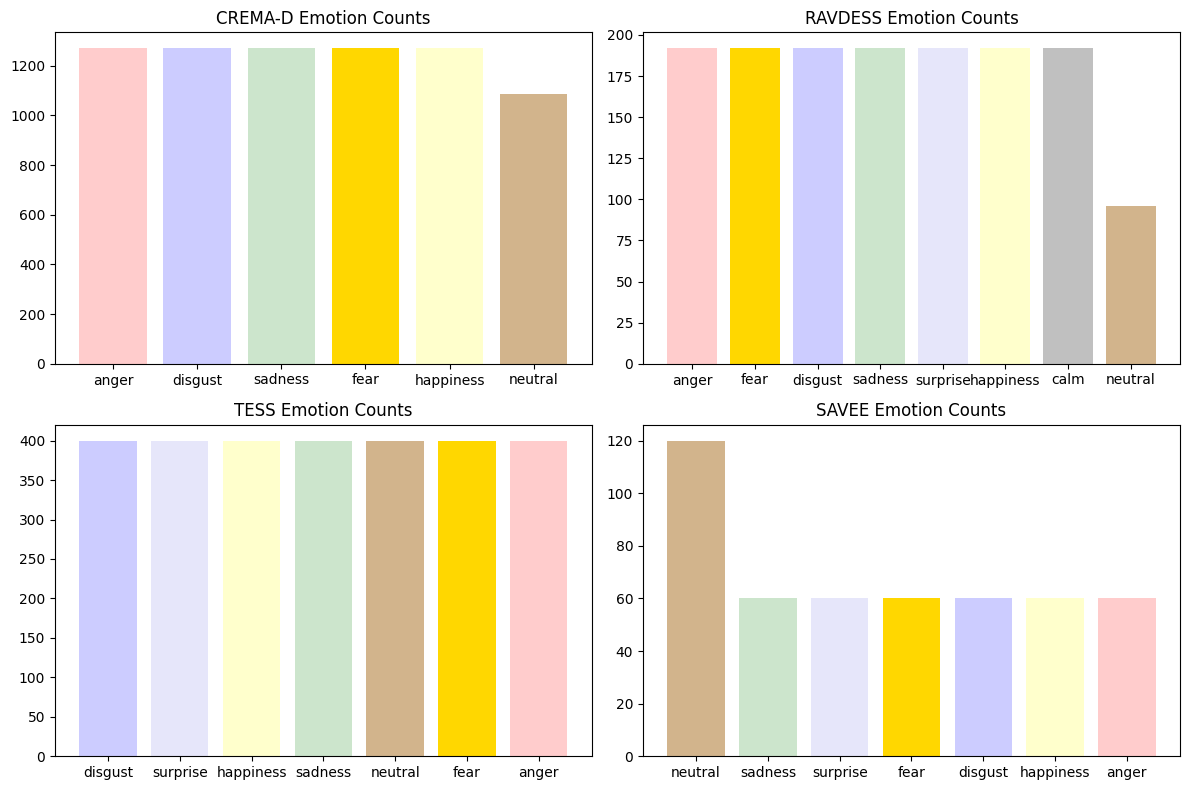

In [8]:
import matplotlib.pyplot as plt

# Dataset the counts stored in variables like below
crema_counts = cremad_df['Emotion'].value_counts()
ravdess_counts = ravdess_df['Emotion'].value_counts()
tess_counts = tess_df['Emotion'].value_counts()
savee_counts = savee_df['Emotion'].value_counts()

# Define a color mapping for each emotion
emotion_colors = {
    'anger': '#FFCCCC',    # Light Red
    'disgust': '#CCCCFF',  # Light Blue
    'sadness': '#CCE5CC',  # Light Green
    'fear': '#FFD700',     # Gold
    'happiness': '#FFFFCC',# Light Yellow
    'neutral': '#D2B48C',  # Tan
    'surprise': '#E6E6FA', # Lavender
    'calm': '#C0C0C0'      # Silver for 'calm' emotion
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# CREMA-D
axes[0, 0].bar(crema_counts.index, crema_counts.values, color=[emotion_colors.get(emotion, '#C0C0C0') for emotion in crema_counts.index])
axes[0, 0].set_title('CREMA-D Emotion Counts')

# RAVDESS
axes[0, 1].bar(ravdess_counts.index, ravdess_counts.values, color=[emotion_colors.get(emotion, '#C0C0C0') for emotion in ravdess_counts.index])
axes[0, 1].set_title('RAVDESS Emotion Counts')

# TESS
axes[1, 0].bar(tess_counts.index, tess_counts.values, color=[emotion_colors.get(emotion, '#C0C0C0') for emotion in tess_counts.index])
axes[1, 0].set_title('TESS Emotion Counts')

# SAVEE
axes[1, 1].bar(savee_counts.index, savee_counts.values, color=[emotion_colors.get(emotion, '#C0C0C0') for emotion in savee_counts.index])
axes[1, 1].set_title('SAVEE Emotion Counts')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [9]:
# Create a dataframe that contains all the emotion labels and paths from all the datasets
df = pd.concat([cremad_df, ravdess_df, tess_df, savee_df], axis=0)
df = df.reset_index(drop=True)
# Count the number of emotions in the combined dataframe
df['Emotion'].value_counts()

Emotion
anger        1923
disgust      1923
sadness      1923
fear         1923
happiness    1923
neutral      1703
surprise      652
calm          192
Name: count, dtype: int64

As expected, all of the dataset's emotions—aside from surprise, calm, and neutral—are well balanced. Since the calm emotion and the neutral emotion are so similar, we shall disregard them. 

In [10]:
# Drop the calm emotion 
df = df[df['Emotion'] != 'calm']
df['Emotion'].value_counts()

Emotion
anger        1923
disgust      1923
sadness      1923
fear         1923
happiness    1923
neutral      1703
surprise      652
Name: count, dtype: int64

## <a id='toc1_4_1_'></a>[Raw Audio Waveforms - Signal](#toc0_)

A signal represents variations in a specific quantity over time. In the context of audio, this quantity is the air pressure. By sampling the air pressure at regular intervals over time, we create a waveform. The rate at which we sample this data can vary, but a common standard is 44.1kHz, corresponding to 44,100 samples per second. The resulting waveform captures the characteristics of the audio signal, and it can be further interpreted, modified, and analyzed using computer software.

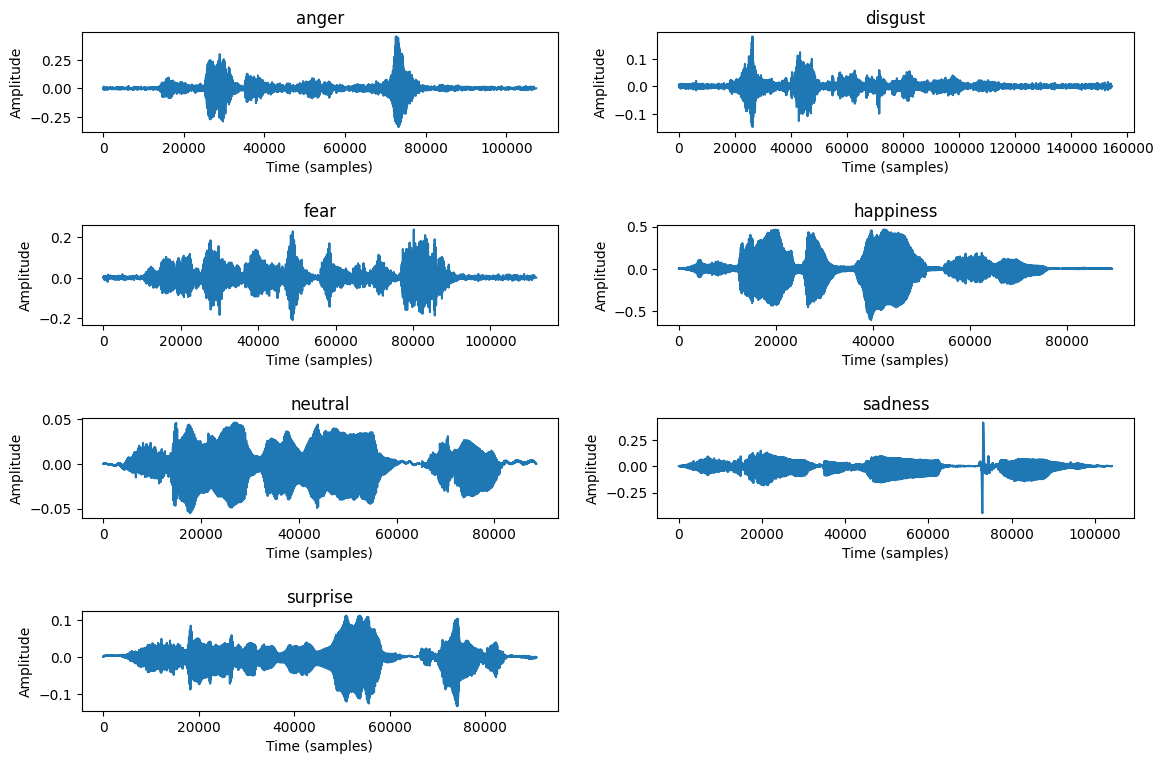

In [11]:
# Create a waveform plot for a sample of each emotion

sample = df.groupby('Emotion', group_keys=False).apply(lambda x: x.sample(1))
sample_paths = sample['Path'].tolist()

plt.figure(figsize=(12, 8))
for i in range(7):
    plt.subplot(4, 2, i+1)
    data, sr = librosa.load(sample_paths[i], sr=44100)
    plt.plot(data)
    plt.title(sample['Emotion'].values[i])
    plt.ylabel('Amplitude')
    plt.xlabel('Time (samples)')

plt.tight_layout(pad=2)
plt.show()


## <a id='toc1_4_2_'></a>[Frequency Spectrum (FFT)](#toc0_)

The Fourier Transform is a mathematical tool essential for understanding audio signals. Audio signals consist of various single-frequency sound waves. The Fourier Transform breaks down a signal into its individual frequencies and amplitudes, transforming it from the time domain to the frequency domain, resulting in a spectrum. This is possible thanks to Fourier's theorem, which states that any signal can be expressed as a combination of sine and cosine waves. The fast Fourier transform (FFT) algorithm efficiently computes this transformation and is widely used in signal processing. Applying FFT to windowed segments of audio enables detailed analysis of frequency components in specific time frames, crucial for tasks like audio processing and analysis.

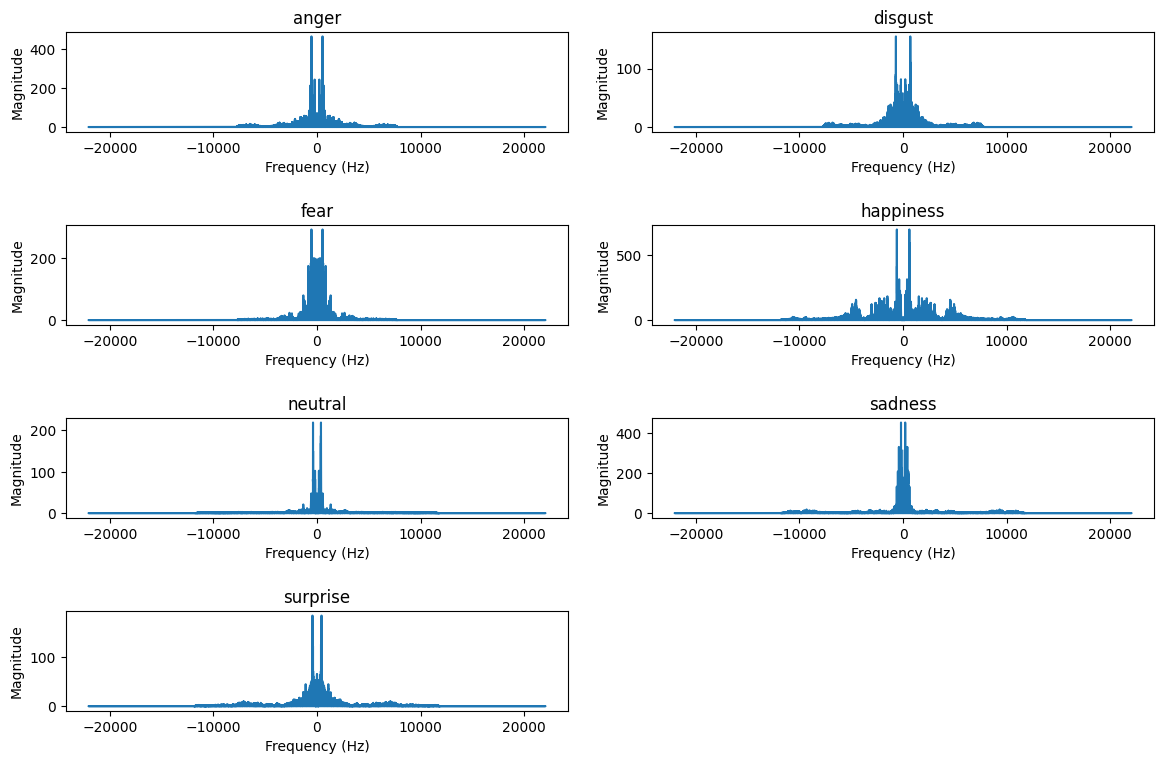

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import librosa

# Create a Spectrum plot for a sample of each emotion
plt.figure(figsize=(12, 8))

for i in range(7):
    plt.subplot(4, 2, i+1)
    data, sr = librosa.load(sample_paths[i], sr=44100)
    
    # Compute the FFT
    fft_result = np.fft.fft(data)
    
    # Calculate the magnitude spectrum
    magnitude_spectrum = np.abs(fft_result)
    
    # Frequency values
    frequency = np.fft.fftfreq(len(fft_result), 1/sr)
    
    # Plot the spectrum
    plt.plot(frequency, magnitude_spectrum)
    
    plt.title(sample['Emotion'].values[i])
    plt.ylabel('Magnitude')
    plt.xlabel('Frequency (Hz)')

plt.tight_layout(pad=2)
plt.show()


## <a id='toc1_4_3_'></a>[Short-Time Fourier Transform (STFT) Spectrogram](#toc0_)

While the FFT excels at analyzing static signal frequencies, it struggles with dynamic signals like music or speech. To address this, we employ the short-time Fourier transform (STFT), computing FFTs on overlapping windows to create a spectrogram. Visualized as stacked FFTs, the spectrogram represents a signal's amplitude variations over time and frequencies. Behind the scenes, the y-axis is on a log scale, and color is in decibels, aligning with human perception's sensitivity to specific frequency and amplitude ranges. The spectrogram offers a concise visual insight into dynamic frequency changes in audio signals.

/var/folders/71/136lc3q10l1c8_fbgscwq49w0000gn/T/ipykernel_19876/3370433129.py:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)


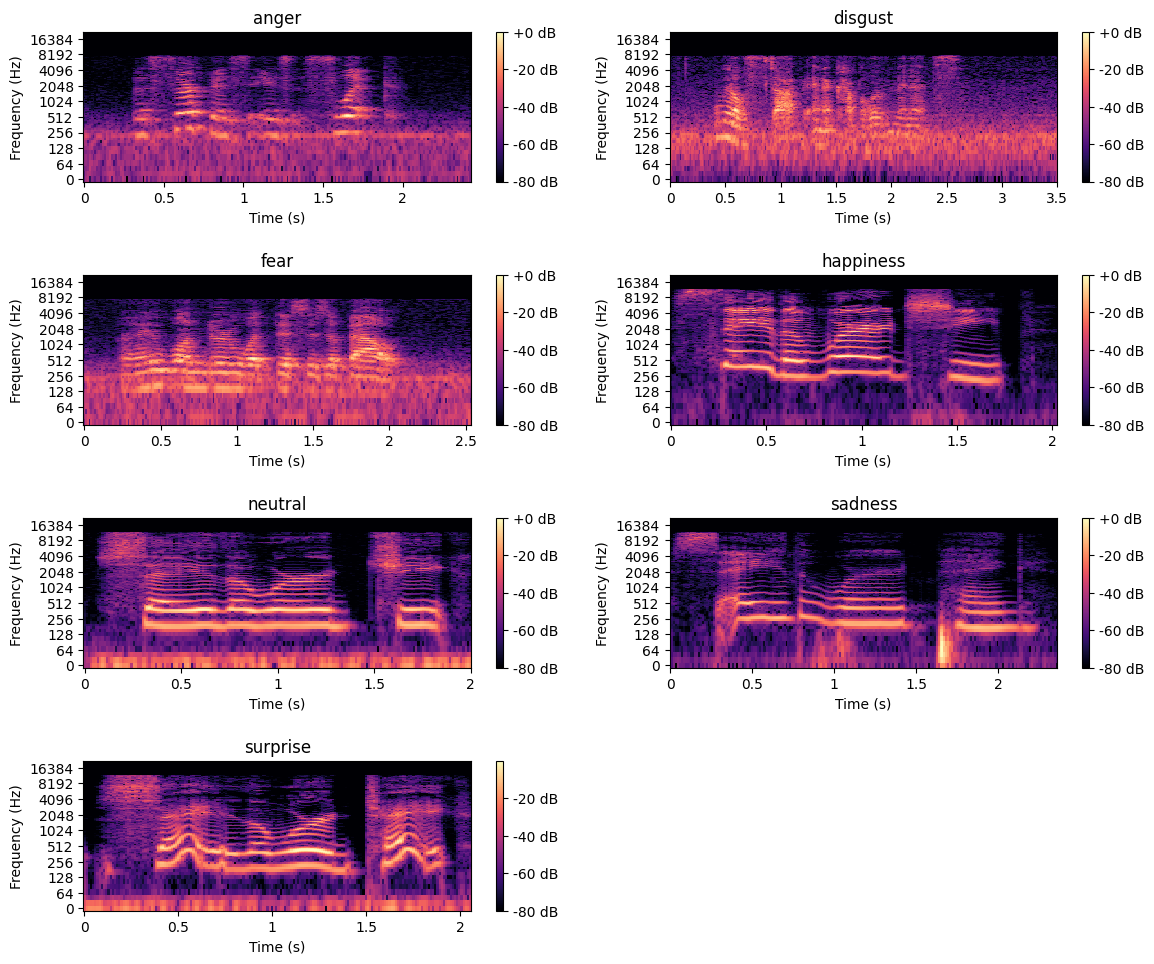

In [13]:
import matplotlib.pyplot as plt
import librosa.display

# Create a Fourier Transform plot for a sample of each emotion
plt.figure(figsize=(12, 10))

for i in range(7):
    plt.subplot(4, 2, i+1)
    data, sr = librosa.load(sample_paths[i], sr=44100)
    
    # Compute the short-time Fourier transform (STFT)
    D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)
    
    # Display the spectrogram
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    
    plt.title(sample['Emotion'].values[i])
    plt.colorbar(format='%+2.0f dB')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')

plt.tight_layout(pad=2)
plt.show()

## <a id='toc1_4_4_'></a>[Mel Spectrogram](#toc0_)

The Mel Scale

Research indicates that human perception of frequencies is not linear. We're more adept at discerning differences in lower frequencies than in higher ones. To address this, Stevens, Volkmann, and Newmann proposed the mel scale in 1937, aiming to create a pitch unit where equal pitch intervals sound equally distant to listeners. Consequently, we apply a mathematical operation to convert frequencies to the mel scale.

The Mel Spectrogram

A mel spectrogram transforms frequencies into the mel scale. Surprisingly, this seemingly complex concept translates into just a few lines of code, making the implementation of a mel spectrogram remarkably straightforward.

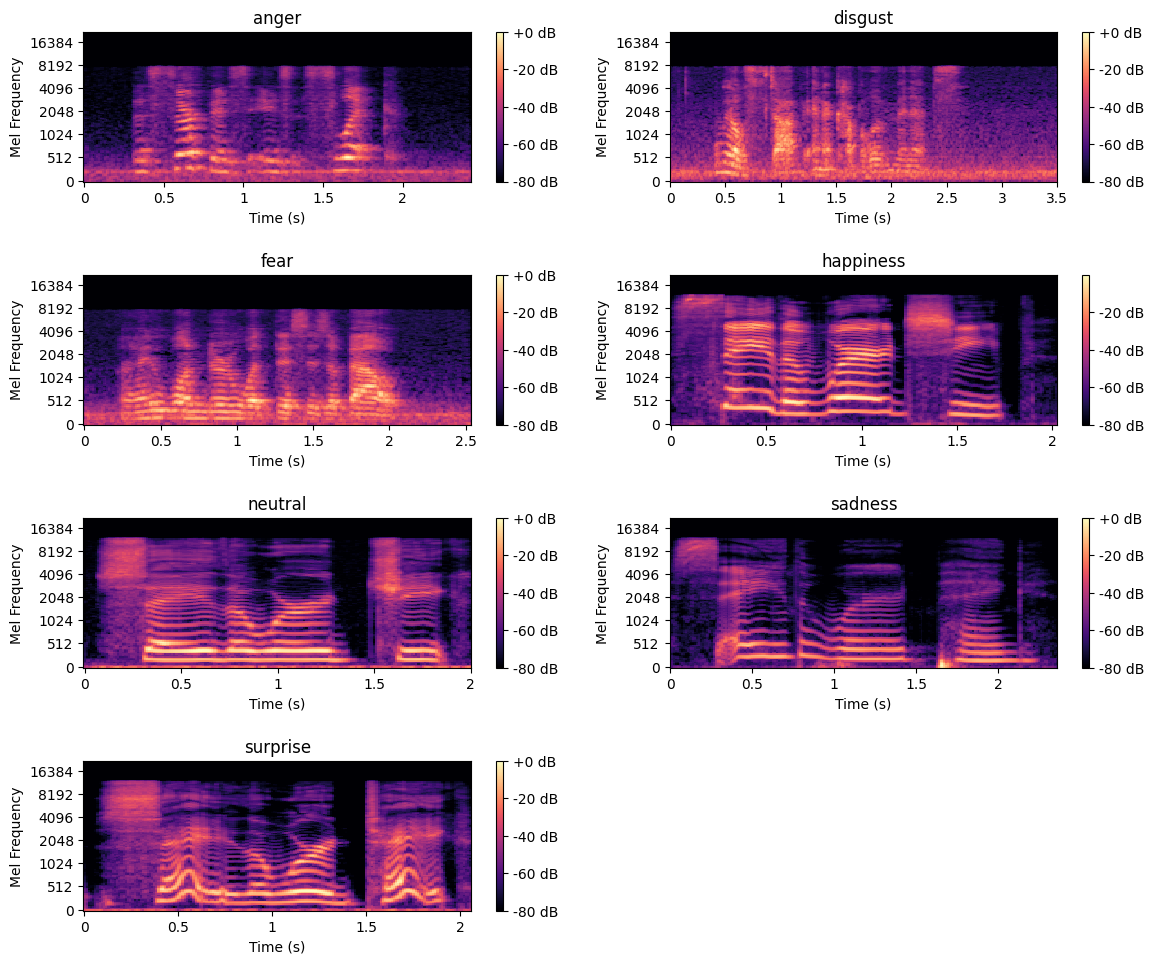

In [14]:
import matplotlib.pyplot as plt
import librosa.display

# Create a Mel Spectrogram plot for a sample of each emotion
plt.figure(figsize=(12, 10))

for i in range(7):
    plt.subplot(4, 2, i+1)
    data, sr = librosa.load(sample_paths[i], sr=44100)
    
    # Compute the Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
    
    # Convert to decibels (log scale)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    # Display the Mel spectrogram
    librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    
    plt.title(sample['Emotion'].values[i])
    plt.colorbar(format='%+2.0f dB')
    plt.ylabel('Mel Frequency')
    plt.xlabel('Time (s)')

plt.tight_layout(pad=2)
plt.show()


## <a id='toc1_5_'></a>[Modeling](#toc0_)

## <a id='toc1_5_1_'></a>[Mel Spectrogram CNN Model](#toc0_)

In [15]:
# Encode the emotion labels into numbers 
encoder = LabelEncoder()
df['Emotion'] = encoder.fit_transform(df['Emotion'])
#df['Emotion'].value_counts()

In [16]:
# Create a function that takes an audio file path and returns the mel spectrogram
def process_audio(path):
    # Load the audio file and set the sampling rate to 44100
    audio, sr = librosa.load(path, sr=44100, duration=4, mono=True)
    # pad the audio files that are less than 4 seconds with zeros at the end
    if len(audio) < 4 * sr:
        audio = np.pad(audio, pad_width=(0, 4 * sr - len(audio)), mode='constant')
    # Convert the audio file into a mel spectrogram
    signal = librosa.feature.melspectrogram(y = audio, sr=sr, n_mels=128)
    # Convert the spectrogram from amplitude squared to decibels
    # as amplitude does not give us much information
    signal = librosa.power_to_db(signal, ref=np.min) 
    image = np.array(signal)
    return image

In [17]:
# Divide the data into features and labels
X_mel = [process_audio(path) for path in df['Path']]
y_mel = df['Emotion']
# Check the length of the feature and label lists
print('Number of images:', len(X_mel))
print('Number of labels:', len(y_mel))

Number of images: 11970
Number of labels: 11970


In [18]:
# Divide the data into training and testing sets, with a 80:20 split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_mel, y_mel,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True)
# Standardize the data by subtracting the mean and dividing by the standard deviation
mean = np.mean(X_train_1)
std = np.std(X_train_1)
X_train_1 = (X_train_1 - mean) / std
X_test_1 = (X_test_1 - mean) / std

In [19]:
# Reshape the data into 4D arrays so that it can be input into the 2D CNN
X_train_1 = X_train_1.reshape(X_train_1.shape[0], 128, 345, 1)
X_test_1 = X_test_1.reshape(X_test_1.shape[0], 128, 345, 1)
# Check the shape of the arrays
#print('X_train shape:', X_train_1.shape)
#print('X_test shape:', X_test_1.shape)

In [20]:
# Divide the data into batches of 32 images
batch_size = 32
# Make a training dataset from the training set
train_dataset_1 = tf.data.Dataset.from_tensor_slices((X_train_1, y_train_1))
# Shuffle, batch, and prefetch the data
train_dataset_1 = train_dataset_1.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# Make a testing dataset from the testing set
test_dataset_1 = tf.data.Dataset.from_tensor_slices((X_test_1, y_test_1))
# Shuffle, batch, and prefetch the data
test_dataset_1 = test_dataset_1.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [21]:
# Define the CNN model
model_mel = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 345, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    # Dropout layer randomly sets 50% of the activations to zero
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model_mel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Plot the model architecture
tf.keras.utils.plot_model(model_mel, show_shapes=True, to_file='model_mel.png')

# Create a callback that stops training when the validation loss reaches a certain level.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode = 'min')
# Create a callback that adjusts the learning rate gradually
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                    factor=0.2,
                                                    min_lr=0.000001,
                                                    patience=3,
                                                    mode='min')
# Train the model
history_mel = model_mel.fit(train_dataset_1,
                    epochs=100,
                    validation_data=test_dataset_1,
                    callbacks=[early_stop, lr_scheduler],verbose=0)

# Save the model
model_mel.save('emotion_recognition_mel.keras')

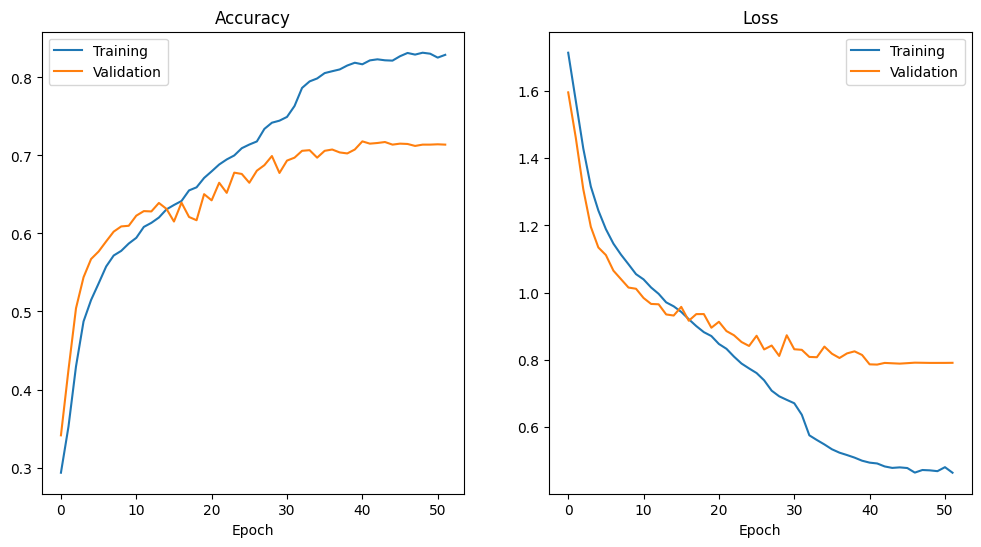

In [22]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_mel.history['accuracy'], label='Training')
plt.plot(history_mel.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()
# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_mel.history['loss'], label='Training')
plt.plot(history_mel.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

In [23]:
# Measure the precision and recall
y_pred = model_mel.predict(X_test_1)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Plot the classification report
print(classification_report(y_test_1, y_pred, target_names=encoder.classes_))

75/75 [==============================] - 24s 313ms/step
              precision    recall  f1-score   support

       anger       0.80      0.83      0.81       372
     disgust       0.73      0.65      0.69       410
        fear       0.69      0.58      0.63       374
   happiness       0.70      0.67      0.69       394
     neutral       0.73      0.78      0.75       356
     sadness       0.61      0.76      0.67       362
    surprise       0.91      0.83      0.87       126

    accuracy                           0.72      2394
   macro avg       0.74      0.73      0.73      2394
weighted avg       0.72      0.72      0.71      2394



## <a id='toc1_5_2_'></a>[MFCCs CNN Model](#toc0_)

In [24]:
# Create a function that extracts Mel-Frequency Cepstral Coefficients (MFCCs) from an audio file
def extract_mfcc(path):
    # Load the audio file and set the sampling rate to 44100
    audio, sr = librosa.load(path, sr=44100, duration=4, mono=True)
    # Pad the audio files that are less than 4 seconds with zeros at the end
    if len(audio) < 4 * sr:
        audio = np.pad(audio, pad_width=(0, 4 * sr - len(audio)), mode='constant')
    # Convert the audio file into MFCC
    signal = librosa.feature.mfcc(y = audio, sr=sr, n_mfcc=128)
    # Return the MFCCs as a numpy array
    return np.array(signal)

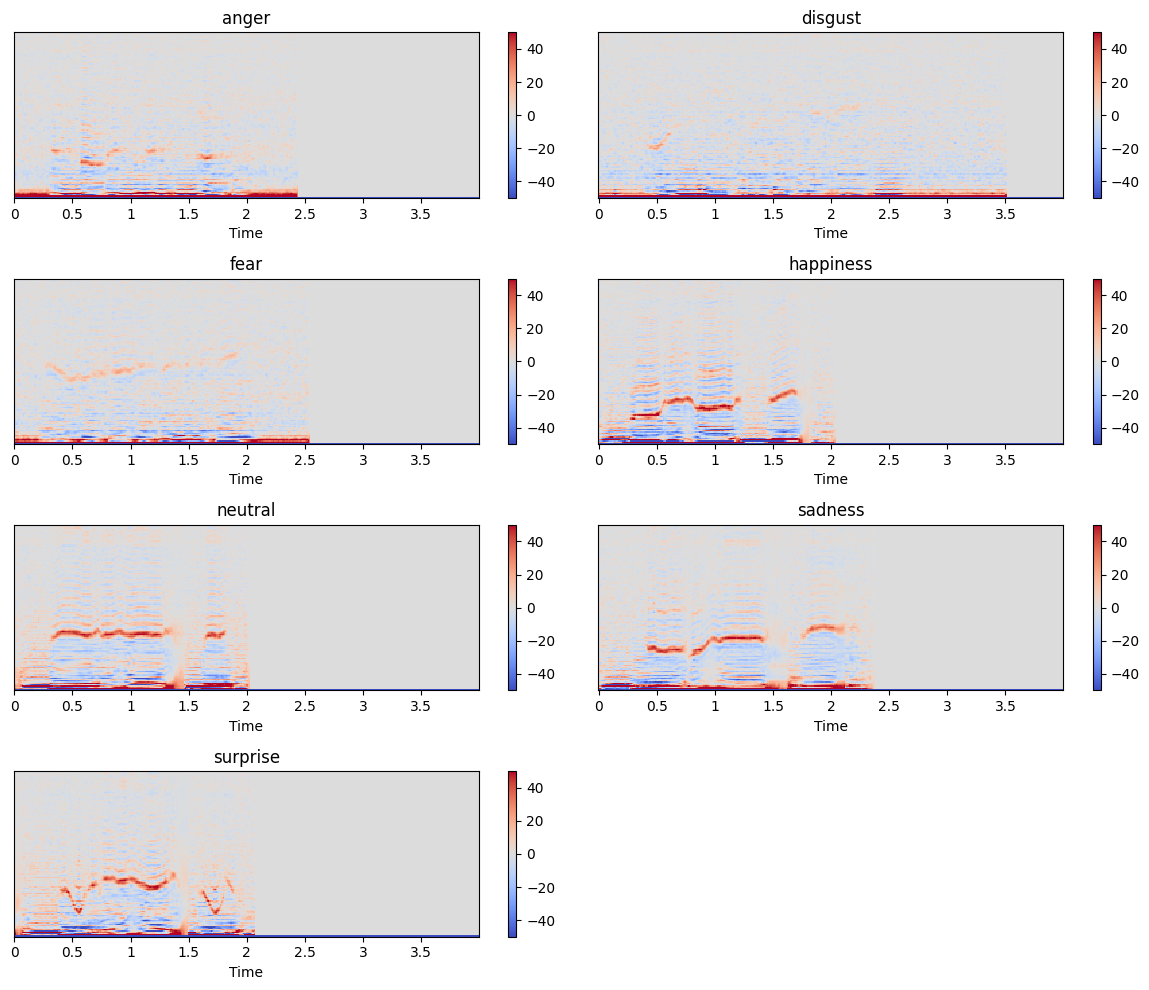

In [25]:
# Visualize the MFCCs for each emotion
plt.figure(figsize=(12, 10))
for i in range(7):
    plt.subplot(4, 2, i+1)
    # Extract the MFCCs from the audio file
    mfcc = extract_mfcc(sample_paths[i])
    librosa.display.specshow(mfcc, sr=sr, x_axis='time', norm = Normalize( vmin = -50, vmax = 50))
    plt.title(sample['Emotion'].values[i])
    plt.colorbar()
plt.tight_layout()

In [26]:
# Divide the data into features and labels
X_mfcc = [extract_mfcc(path) for path in df['Path']]
y_mfcc = df['Emotion']

# Divide the data into training and testing sets, with a 80:20 split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_mfcc, y_mfcc,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True)

# Convert the lists into numpy arrays
X_train_2 = np.array(X_train_2)
X_test_2 = np.array(X_test_2)
y_train_2 = np.array(y_train_2)
y_test_2 = np.array(y_test_2)

# Standardize the data by subtracting the mean and dividing by the standard deviation
mean = np.mean(X_train_2)
std = np.std(X_train_2)
X_train_2 = (X_train_2 - mean) / std
X_test_2 = (X_test_2 - mean) / std

# Reshape the data into 4D arrays so that it can be input into the 2D CNN
X_train_2 = X_train_2.reshape(X_train_2.shape[0], 128, 345, 1)
X_test_2 = X_test_2.reshape(X_test_2.shape[0], 128, 345, 1)
# Check the shape of the arrays
print('X_train shape:', X_train_2.shape)
print('X_test shape:', X_test_2.shape)

# Divide the data into batches of 32 images
batch_size = 32
# Make a training dataset from the training set
train_dataset_2 = tf.data.Dataset.from_tensor_slices((X_train_2, y_train_2))
# Shuffle, batch, and prefetch the data
train_dataset_2 = train_dataset_2.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# Make a testing dataset from the testing set
test_dataset_2 = tf.data.Dataset.from_tensor_slices((X_test_2, y_test_2))
# Shuffle, batch, and prefetch the data
test_dataset_2 = test_dataset_2.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

X_train shape: (9576, 128, 345, 1)
X_test shape: (2394, 128, 345, 1)


In [27]:
# Define the CNN model
model_mfcc = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 345, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Batch normalization maintains the 0 mean and 1 standard deviation
    tf.keras.layers.BatchNormalization(),
    # Second convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Third convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    # Dropout layer randomly sets 50% of the activations to zero
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model_mfcc.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Plot the model architecture
tf.keras.utils.plot_model(model_mfcc, show_shapes=True, to_file='model_mfcc.png')


# fit the model
history_mfcc = model_mfcc.fit(train_dataset_2,
                    epochs=100,
                    validation_data=test_dataset_2,
                    callbacks=[early_stop, lr_scheduler],verbose=0)

# Save the model
model_mfcc.save('emotion_recognition_mfcc.keras')

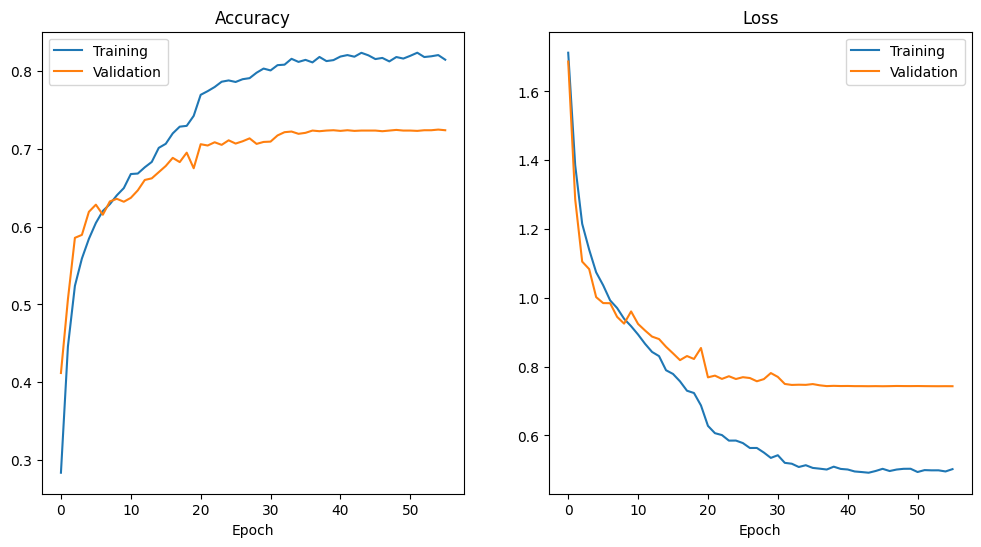

In [28]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_mfcc.history['accuracy'], label='Training')
plt.plot(history_mfcc.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()
# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_mfcc.history['loss'], label='Training')
plt.plot(history_mfcc.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

In [29]:
# Measure the precision and recall
y_pred = model_mfcc.predict(X_test_2)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Plot the classification report
print(classification_report(y_test_2, y_pred, target_names=encoder.classes_))

75/75 [==============================] - 29s 379ms/step
              precision    recall  f1-score   support

       anger       0.82      0.82      0.82       372
     disgust       0.71      0.67      0.69       410
        fear       0.70      0.59      0.64       374
   happiness       0.72      0.70      0.71       394
     neutral       0.74      0.78      0.76       356
     sadness       0.61      0.74      0.67       362
    surprise       0.92      0.87      0.89       126

    accuracy                           0.72      2394
   macro avg       0.75      0.74      0.74      2394
weighted avg       0.73      0.72      0.72      2394



## <a id='toc1_5_3_'></a>[Mel Spectrogram CRNN Model](#toc0_)

In [30]:
# Build a CRNN model
model_crnn = tf.keras.Sequential([
    # First convolutional layer
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 345, 1), padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Second convolutional layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Third convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # Fourth convolutional layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Reshape((1, 128)),
    # First bidirectional recurrent layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    # Second bidirectional recurrent layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    # Dropout layer randomly sets 50% of the activations to zero
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model_crnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Plot the model architecture
tf.keras.utils.plot_model(model_crnn, show_shapes=True, to_file='model_crnn.png')

# fit the model
history_crnn = model_crnn.fit(train_dataset_2,
                    epochs=100,
                    validation_data=test_dataset_2,
                    callbacks=[early_stop, lr_scheduler],verbose=0)

# Save the model
model_crnn.save('emotion_recognition_crnn.keras')


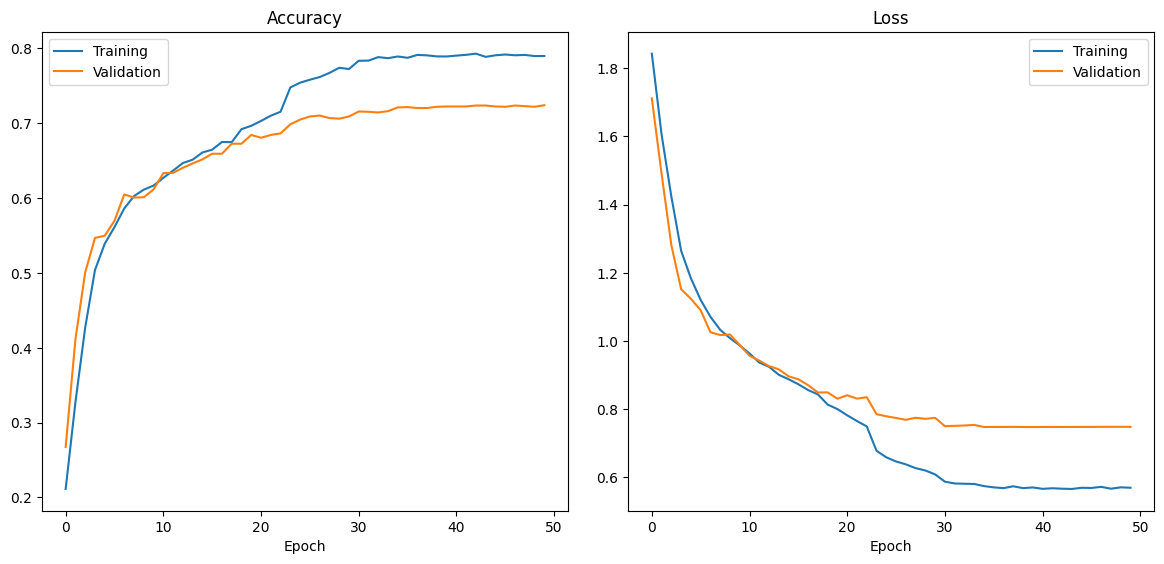

In [31]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_crnn.history['accuracy'], label='Training')
plt.plot(history_crnn.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()
# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_crnn.history['loss'], label='Training')
plt.plot(history_crnn.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout(pad=2)

In [32]:
# Measure the precision and recall
y_pred = model_crnn.predict(X_test_2)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Plot the classification report
print(classification_report(y_test_2, y_pred, target_names=encoder.classes_))

75/75 [==============================] - 12s 141ms/step
              precision    recall  f1-score   support

       anger       0.80      0.81      0.80       372
     disgust       0.72      0.69      0.71       410
        fear       0.70      0.57      0.63       374
   happiness       0.70      0.73      0.71       394
     neutral       0.74      0.76      0.75       356
     sadness       0.63      0.73      0.68       362
    surprise       0.86      0.85      0.86       126

    accuracy                           0.72      2394
   macro avg       0.74      0.73      0.73      2394
weighted avg       0.72      0.72      0.72      2394



## <a id='toc1_6_'></a>[Final Thoughts](#toc0_)

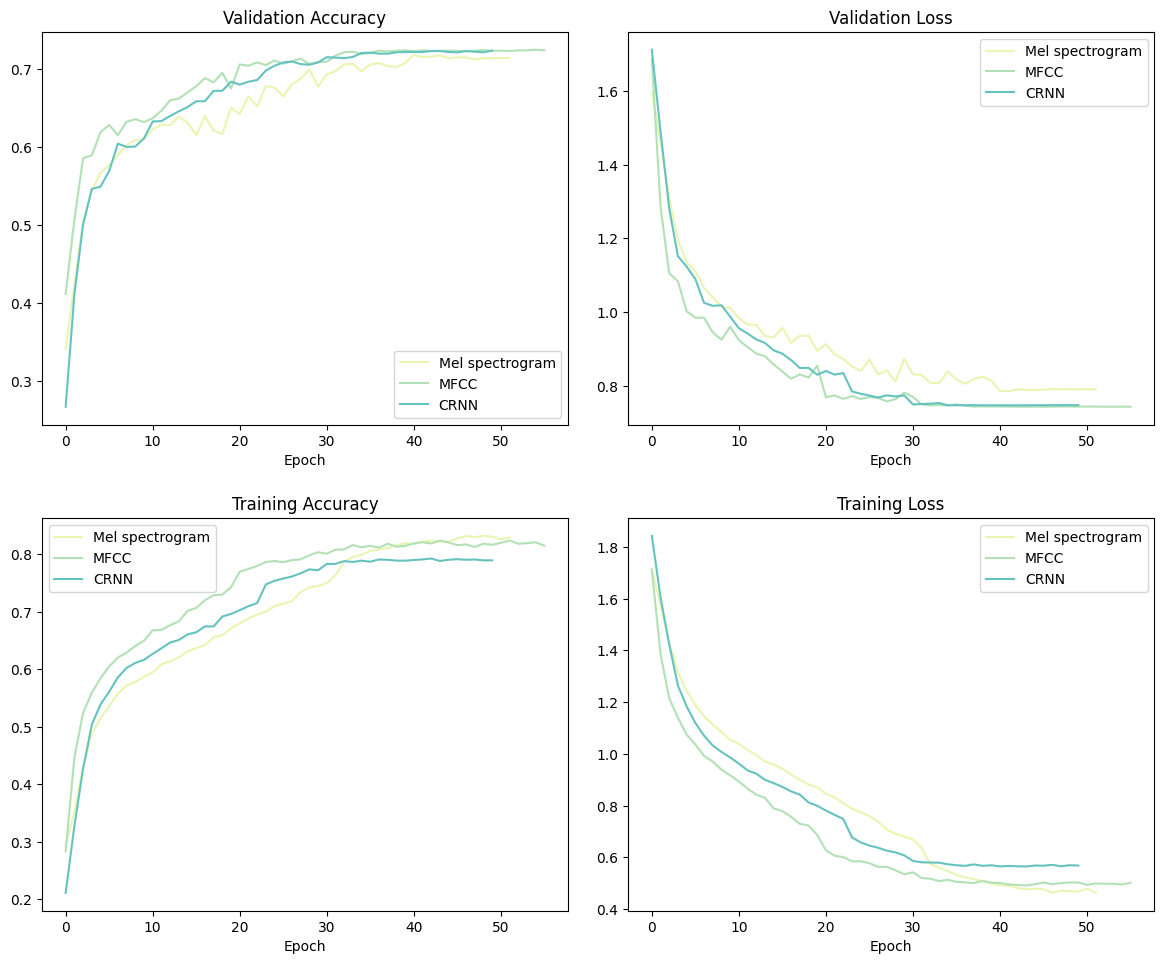

In [34]:
# Compare the performance of the models with a different color palette

import seaborn as sns

sns.set_palette('YlGnBu')  

plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.plot(history_mel.history['val_accuracy'], label='Mel spectrogram')
plt.plot(history_mfcc.history['val_accuracy'], label='MFCC')
plt.plot(history_crnn.history['val_accuracy'], label='CRNN')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_mel.history['val_loss'], label='Mel spectrogram')
plt.plot(history_mfcc.history['val_loss'], label='MFCC')
plt.plot(history_crnn.history['val_loss'], label='CRNN')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(history_mel.history['accuracy'], label='Mel spectrogram')
plt.plot(history_mfcc.history['accuracy'], label='MFCC')
plt.plot(history_crnn.history['accuracy'], label='CRNN')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_mel.history['loss'], label='Mel spectrogram')
plt.plot(history_mfcc.history['loss'], label='MFCC')
plt.plot(history_crnn.history['loss'], label='CRNN')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout(pad=2)
plt.show()


In [35]:
# Get the predictions for the datasets
y_pred_mel = model_mel.predict(X_test_1)
y_pred_mfcc = model_mfcc.predict(X_test_2)
y_pred_crnn = model_crnn.predict(X_test_2)
# Convert the predictions into one-hot encoded vectors
y_pred_mel = np.argmax(y_pred_mel, axis=1)
y_pred_mfcc = np.argmax(y_pred_mfcc, axis=1)
y_pred_crnn = np.argmax(y_pred_crnn, axis=1)
# Get the confusion matrices
cm_mel = tf.math.confusion_matrix(y_test_1, y_pred_mel)
cm_mfcc = tf.math.confusion_matrix(y_test_2, y_pred_mfcc)
cm_crnn = tf.math.confusion_matrix(y_test_2, y_pred_crnn)

75/75 [==============================] - 10s 138ms/step


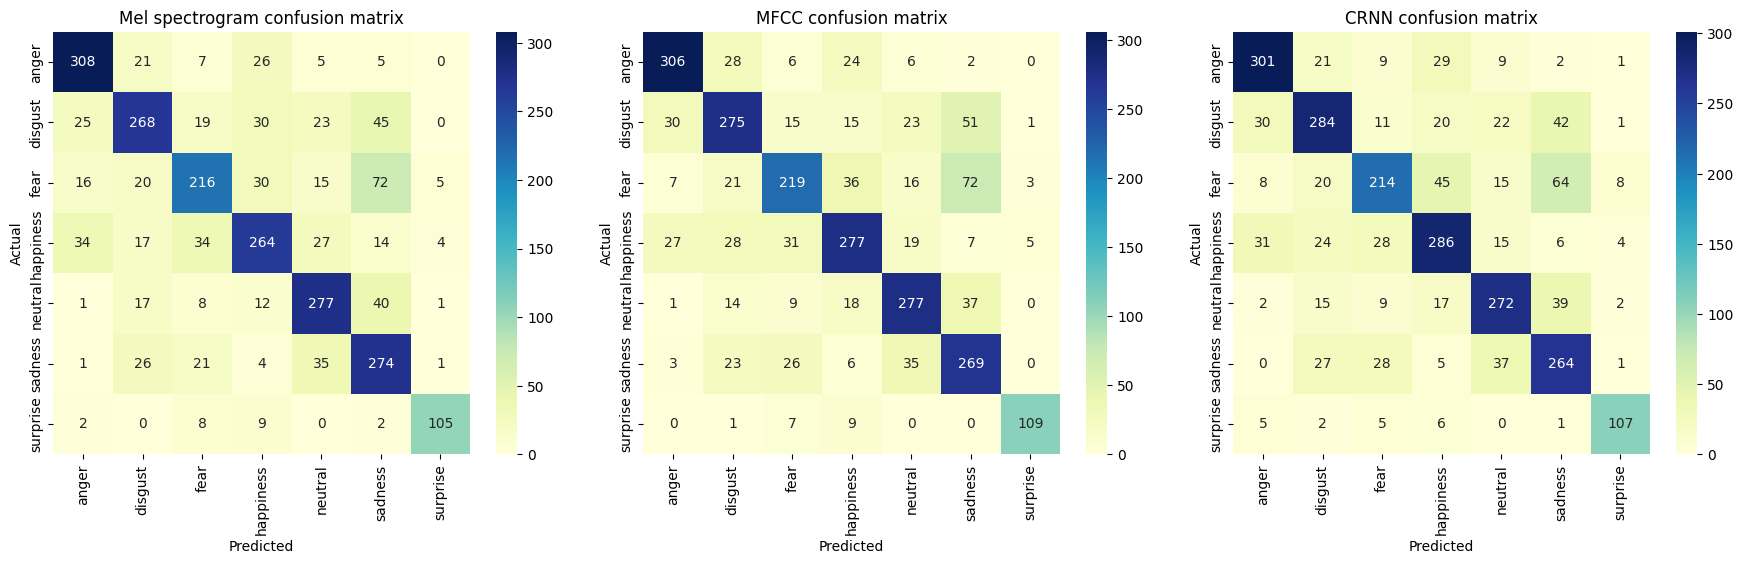

In [39]:
# Plot the confusion matrices side by side
plt.figure(figsize=(18, 6))  

# Mel spectrogram confusion matrix
plt.subplot(1, 3, 1)  
cm_mel_df = pd.DataFrame(cm_mel, index=encoder.classes_, columns=encoder.classes_)
sns.heatmap(cm_mel_df, annot=True, fmt='', cmap='YlGnBu')
plt.title('Mel spectrogram confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# MFCC confusion matrix
plt.subplot(1, 3, 2)  
cm_mfcc_df = pd.DataFrame(cm_mfcc, index=encoder.classes_, columns=encoder.classes_)
sns.heatmap(cm_mfcc_df, annot=True, fmt='', cmap='YlGnBu')
plt.title('MFCC confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# CRNN confusion matrix
plt.subplot(1, 3, 3)  
cm_crnn_df = pd.DataFrame(cm_crnn, index=encoder.classes_, columns=encoder.classes_)
sns.heatmap(cm_crnn_df, annot=True, fmt='', cmap='YlGnBu')
plt.title('CRNN confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout(pad=2)
plt.show()


In [40]:
# Compare the precision and recall of the models
print('Mel spectrogram')
print(classification_report(y_test_1, y_pred_mel, target_names=encoder.classes_))
print('MFCC')
print(classification_report(y_test_2, y_pred_mfcc, target_names=encoder.classes_))
print('CRNN')
print(classification_report(y_test_2, y_pred_crnn, target_names=encoder.classes_))

Mel spectrogram
              precision    recall  f1-score   support

       anger       0.80      0.83      0.81       372
     disgust       0.73      0.65      0.69       410
        fear       0.69      0.58      0.63       374
   happiness       0.70      0.67      0.69       394
     neutral       0.73      0.78      0.75       356
     sadness       0.61      0.76      0.67       362
    surprise       0.91      0.83      0.87       126

    accuracy                           0.72      2394
   macro avg       0.74      0.73      0.73      2394
weighted avg       0.72      0.72      0.71      2394

MFCC
              precision    recall  f1-score   support

       anger       0.82      0.82      0.82       372
     disgust       0.71      0.67      0.69       410
        fear       0.70      0.59      0.64       374
   happiness       0.72      0.70      0.71       394
     neutral       0.74      0.78      0.76       356
     sadness       0.61      0.74      0.67       362
   

## <a id='toc1_7_'></a>[Real Life Integration (Future Work)](#toc0_) 

In [41]:
!jupyter nbconvert Term_Project.ipynb --to html


[NbConvertApp] Converting notebook Term_Project_Cleaning.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 4897909 bytes to Term_Project_Cleaning.html
